# Introduction

Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado.

This data are weekly data from each quantity sold and helps us to have a more insightful information about the preferences of the United States Market.

# Code

## Importing dataFrame

Lets figure out which size is the most popular:

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

First of all we read the *.pkl* file, which has more potential to export big quantities of data.

In [32]:
avocados = pd.read_pickle("avoplotto.pkl")
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


## Number of avocados by size

Now we get the total number of avocados sold by each size:

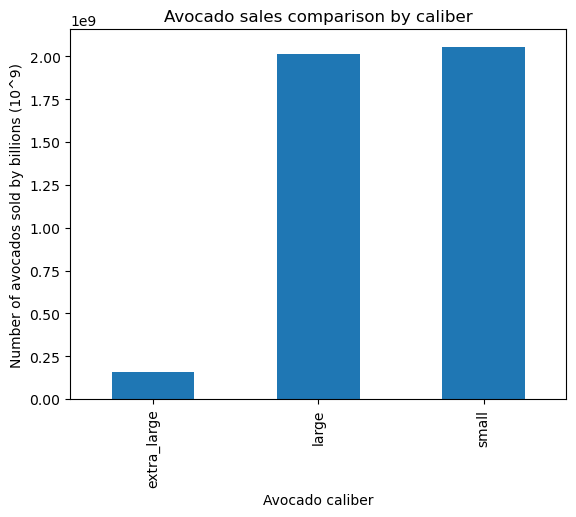

In [33]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")
plt.title("Avocado sales comparison by caliber")
plt.xlabel("Avocado caliber")
plt.ylabel("Number of avocados sold by billions (10^9)")
plt.show()

It looks like small avocados were the most-purchased size, but large avocados were a close second. If we want to go further, we can see how they evolve with time and we can see if avocados have become popular or is just a perceived bias.


## Sales Evolution

Let´s have a look in an interval of three years:

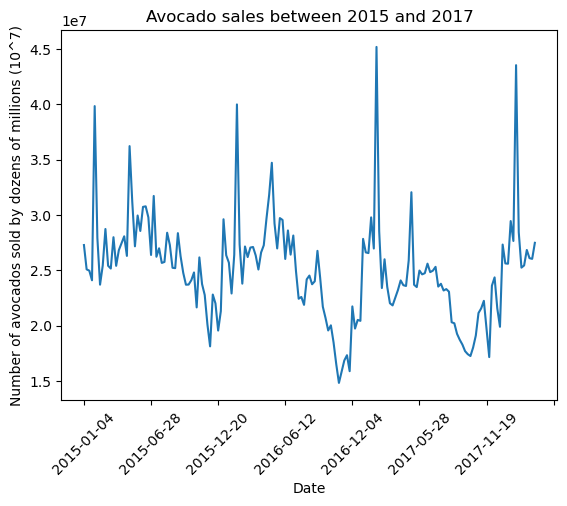

In [34]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind = "line")
plt.title("Avocado sales between 2015 and 2017")
plt.xlabel("Date")
plt.ylabel("Number of avocados sold by dozens of millions (10^7)")
plt.xticks(rotation = 45)
plt.show()

All the avocados sales have a spike around the same time of the year, were they reach between 40 millions of units and 45 millions of units sold. This can be useful to have a solid prediction for the next years, as they are all happening in the same moment.

With a fast function we can see that:

In [35]:
max_4_sales = sorted(nb_sold_by_date.values, reverse=True)[0:4]
max_4_dates = sorted(nb_sold_by_date.index, reverse=True)[0:4]
print(max_4_sales, max_4_dates)

[45188511.24, 43539862.8, 39990836.58, 39838734.08] ['2018-03-25', '2018-03-18', '2018-03-11', '2018-03-04']


**All the big values are around the month of March so we should increase the deployment of avocados in that month in all stores.**

## Prices Correlation

We can compare the correlation between prices and how many sales of avocados have taken place:

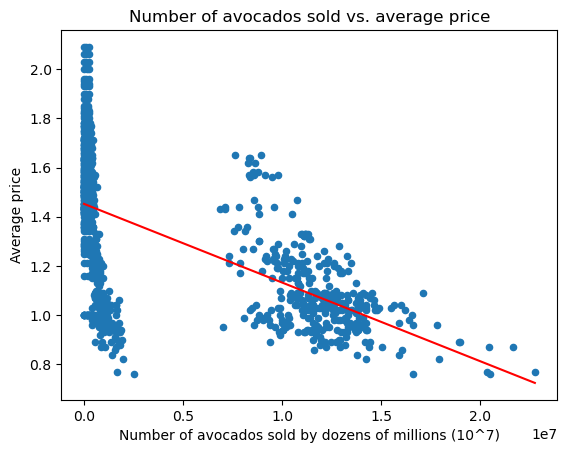

In [36]:
avocados.plot(x = "nb_sold", y = "avg_price", kind = "scatter", title = "Number of avocados sold vs. average price")
plt.plot(np.unique(avocados["nb_sold"]), np.poly1d(np.polyfit(avocados["nb_sold"], avocados["avg_price"], 1))\
         (np.unique(avocados["nb_sold"])), color='red')
plt.xlabel("Number of avocados sold by dozens of millions (10^7)")
plt.ylabel("Average price")
plt.show()

In [38]:
np.corrcoef(avocados["nb_sold"], avocados["avg_price"])[0,1]

-0.6065951940740364

We can clearly see that there´s a negative correlation between the avocado´s quantity sold and the prices of the avocados. 

## Comparing conventional vs. organic avocados

One of the most controversial points while importing and exporting fruits from different countries is if they want them to be organic or not. We can see here a comparison between prices to have a general idea between how much they differ from one another.

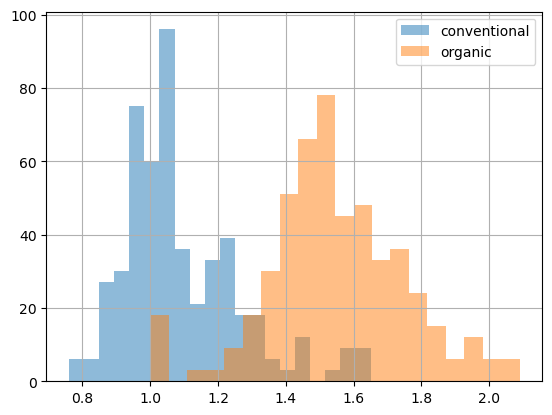

In [41]:
# Comparison
avocados[avocados["type"] == "conventional"]["avg_price"].hist(bins = 20,alpha=0.5)
avocados[avocados["type"] == "organic"]["avg_price"].hist(bins = 20,alpha=0.5)
plt.legend(["conventional", "organic"])

plt.show()

We can see that on average, organic avocados are more expensive than conventional ones, but their price distributions have some overlap.